# Pre code

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

df = pd.read_csv("../data/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2000)]


<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_mortality                  1649 non-null   float64
 5   Infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five_deaths                1649 non-null   int64  
 12  Polio                    

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

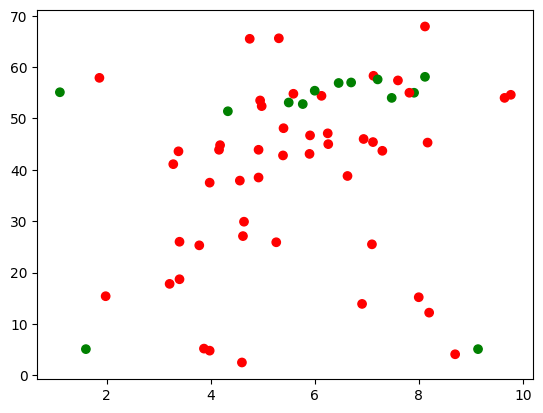

In [6]:
df_X = df1[['Total_expenditure', 'BMI']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

## Question 1: 

* **Why was the label status binarized?** 

The label status was binarized because we are working on a classification problem. Thus, the different class would be Developping and developped, it can also be seen as doing and done. But at the end of the day string can't be treated as boolean easily. That's why we binarized the label status to cmap the scatter plot

* **Is this feature space easily separable? Justify your response**

An easily separable feature space in machine learning refers to a situation where the data points, when represented in a multi-dimensional feature space, can be effectively and distinctly divided into different classes or categories. This means that the boundaries or decision surfaces that separate these classes are well-defined and can be easily distinguished by a machine learning algorithm.
Thus here given the definition, this feature space "status" is not easily separable in a two dimensional space. To increase our chance to have a easily separable space we need to increase the dimension with certain formulas

**Plot of the total expenditure against schooling**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

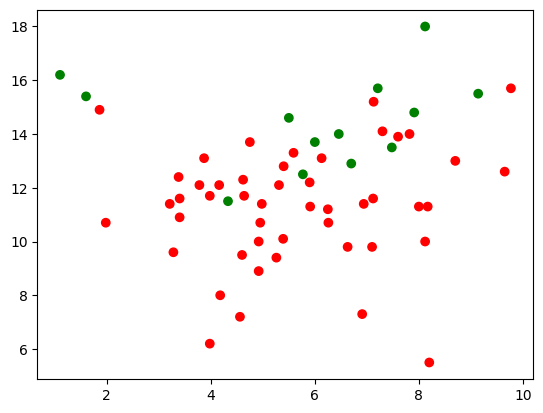

In [7]:
np1 = df1[['Total_expenditure', 'Schooling']].to_numpy()
#df_Y
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

**Plot of the life xpectancy against schooling**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

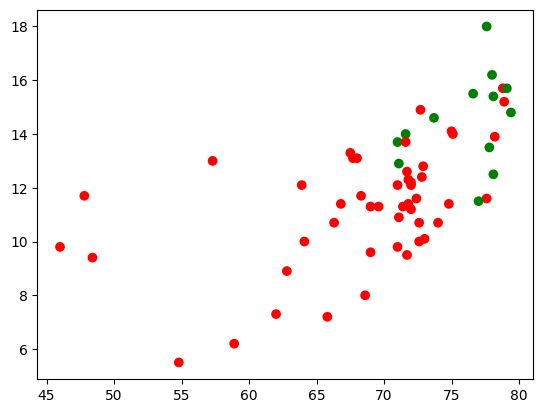

In [8]:
np1 = df1[['Life_expectancy', 'Schooling']].to_numpy()
#df_Y
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

# Question 2

Here the best feature to use as predictors are : **'Life_expectancy'** and  **'Schooling'** because these feature would be easier to separate. Because the base vector minimizes the error false positve and negative

**2.1**

In [9]:
df_X = df1[['Life_expectancy', 'Schooling']]
np1 = df_X.to_numpy()
np_X_norm = np1
np_Y = df_Y.to_numpy()

In [10]:
#Normalizing the dataset using by dividing by the max value
np_X_norm[:,0] = np1[:,0]/max(np1[:,0])
np_X_norm[:,1] = np1[:,1]/max(np1[:,1])

In [1]:
%pip install scikit-learn==1.1.3

     |████████████████████████████████| 31.2 MB 78 kB/s  eta 0:00:01    |▋                               | 593 kB 4.6 MB/s eta 0:00:07           | 6.5 MB 4.6 MB/s eta 0:00:06��██▋           | 20.2 MB 9.1 MB/s eta 0:00:02███████████████████████▋      | 25.0 MB 9.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


**TO DO 2.2**

Each following cell performs a learning step and an AUC scores computation. For each classifier, several parameters have been chosen.

/home/user/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/user/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.9294871794871794


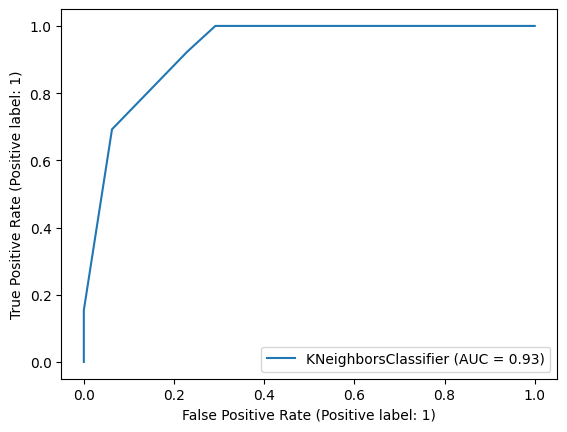

In [11]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(np_X_norm, np_Y)

np_Y_pred = clf1.predict_proba(np_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf1, np_X_norm, np_Y)
plt.show()

/home/user/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.9086538461538461


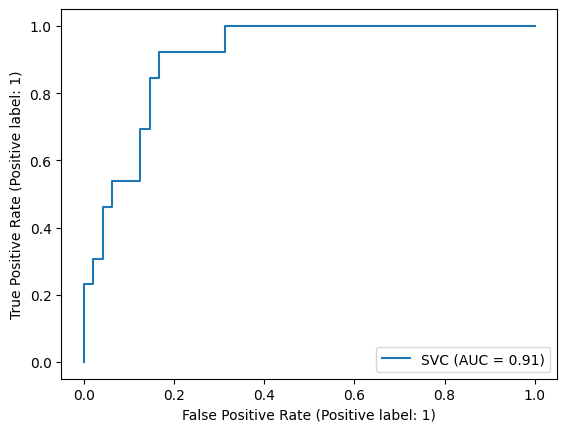

In [12]:
from sklearn.svm import SVC

clf2 = SVC(C=2.0, kernel='linear', probability=True)
clf2.fit(np_X_norm, np_Y)

np_Y_pred = clf2.predict_proba(np_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf2, np_X_norm, np_Y)
plt.show()

0.9799679487179488


/home/user/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


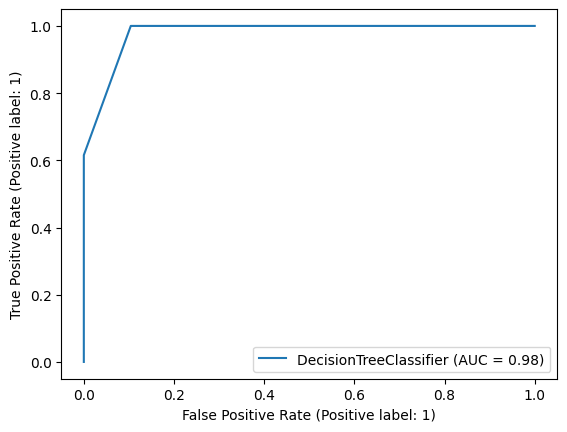

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(np_X_norm, np_Y)

np_Y_pred = clf3.predict_proba(np_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf3, np_X_norm, np_Y)
plt.show()

/tmp/ipykernel_3698/1765031471.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf4.fit(np_X_norm, np_Y)


0.9775641025641025


/home/user/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


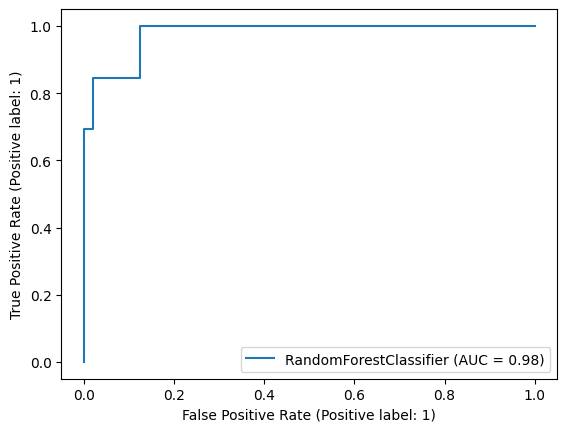

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf4.fit(np_X_norm, np_Y)

np_Y_pred = clf4.predict_proba(np_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf4, np_X_norm, np_Y)
plt.show()